# EDA on general features & after tokenization

## Import data & modules

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("drive/MyDrive/Final Project/story_data_new_feats.csv")

## Light general exploration

In [4]:
print(df.columns)

Index(['url', 'story_id', 'soup', 'title', 'author', 'contest_num',
       'won_contest', 'num_likes', 'num_comments', 'story_html',
       'date_published', 'num_sent', 'words', 'num_words', 'unique_words',
       'num_unique_words', 'unique_words_percent', 'punctuation', 'num_cats',
       'cat_Western', 'cat_Adult', 'cat_East', 'cat_Color', 'cat_Christian',
       'cat_School', 'cat_Kids', 'cat_Fiction', 'cat_Holiday', 'cat_Desi',
       'cat_Black', 'cat_Asian', 'cat_Latinx', 'cat_Gay', 'cat_Drama',
       'cat_Adventure', 'cat_Coming', 'cat_Transgender', 'cat_Middle',
       'cat_Indigenous', 'cat_Suspense', 'cat_Nonfiction', 'cat_Young',
       'cat_Thriller', 'cat_Friendship', 'cat_Contemporary', 'cat_Sad',
       'cat_Romance', 'cat_Fantasy', 'cat_Lesbian', 'cat_Mystery',
       'cat_American', 'cat_Christmas', 'cat_Age', 'cat_Bedtime', 'cat_Happy',
       'cat_Teens', 'cat_Speculative', 'cat_Crime', 'cat_Urban', 'cat_People',
       'cat_Creative', 'cat_Horror', 'cat_Inspirati

In [5]:
print('Dataset dimensions:', df.shape)
print('Does the dataset contain NA?', df.isna().any().any())
print('Data types in dataset:')
print(df.dtypes.value_counts())

Dataset dimensions: (887, 68)
Does the dataset contain NA? True
Data types in dataset:
int64      55
object     12
float64     1
dtype: int64


In [6]:
numerical = ['num_likes', 'num_comments', 'num_sent', 'num_words', 'num_unique_words', 'unique_words_percent']

In [7]:
df[numerical].describe()

,num_likes,num_comments,num_sent,num_words,num_unique_words,unique_words_percent
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000
mean,14.512965,4.717024,119.040586,1795.350620,659.064262,0.380788
std,21.576877,21.759873,52.393809,671.074451,192.155444,0.055200
min,0.000000,0.000000,5.000000,941.000000,320.000000,0.215301
25%,8.000000,0.000000,80.000000,1204.000000,499.500000,0.340399
50%,10.000000,1.000000,111.000000,1602.000000,618.000000,0.380668
75%,14.000000,3.000000,148.000000,2289.000000,802.000000,0.417466
max,460.000000,420.000000,356.000000,3829.000000,1470.000000,0.545859


In [8]:
with pd.option_context('display.max_rows', 1, 'display.max_columns', None): 
    display(df.sample(5))

,url,story_id,soup,title,author,contest_num,won_contest,num_likes,num_comments,story_html,date_published,num_sent,words,num_words,unique_words,num_unique_words,unique_words_percent,punctuation,num_cats,cat_Western,cat_Adult,cat_East,cat_Color,cat_Christian,cat_School,cat_Kids,cat_Fiction,cat_Holiday,cat_Desi,cat_Black,cat_Asian,cat_Latinx,cat_Gay,cat_Drama,cat_Adventure,cat_Coming,cat_Transgender,cat_Middle,cat_Indigenous,cat_Suspense,cat_Nonfiction,cat_Young,cat_Thriller,cat_Friendship,cat_Contemporary,cat_Sad,cat_Romance,cat_Fantasy,cat_Lesbian,cat_Mystery,cat_American,cat_Christmas,cat_Age,cat_Bedtime,cat_Happy,cat_Teens,cat_Speculative,cat_Crime,cat_Urban,cat_People,cat_Creative,cat_Horror,cat_Inspirational,cat_Historical,cat_Science,cat_High,cat_African,cat_Funny
13,https://blog.reedsy.com/short-story/0ad09a/,0ad09a,<!DOCTYPE html>\n\n<html>\n<head>\n<meta chars...,Double Windsor,Mike Garrigan,"['Contest', '#84']",NaN,9,1,"<article class=""font-alt submission-content sp...",2021-03-08 17:26:00,101,['Whenever' 'I' 'wear' ... 'under' 'my' 'vest'],1076,"{'lot', 'on', 'I', 'chocolates', 'vacuoles', '...",510,0.473978,"[',' '.' '.' ',' ',' '’' ':' '.' '’' '.' '?' '...",1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Distributions

Distribution of numerical features:

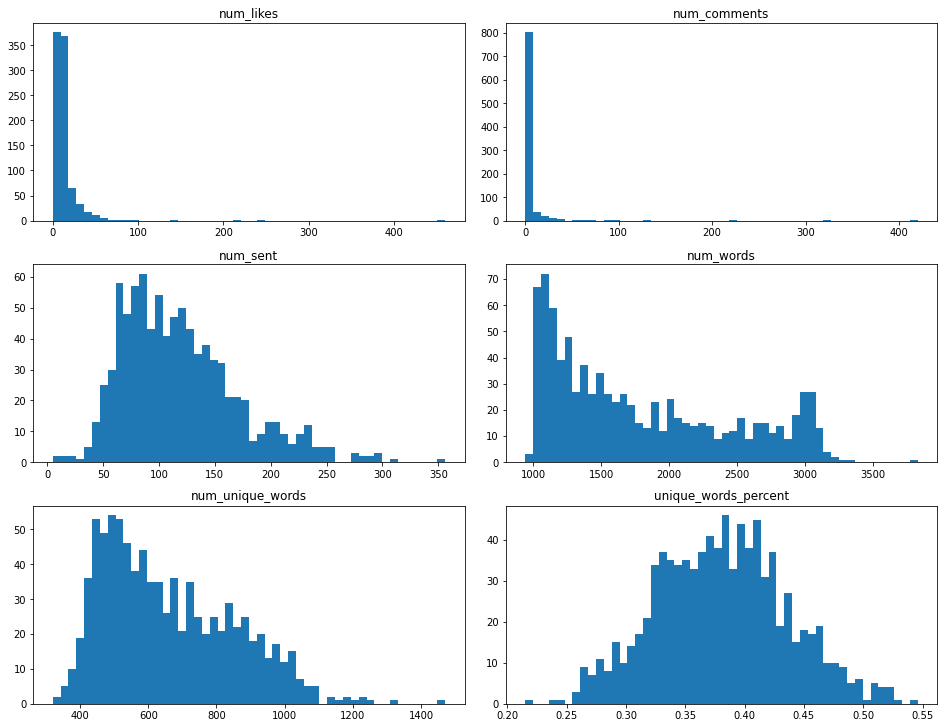

In [9]:
my_j = int(len(numerical)/2)
f,ax=plt.subplots(my_j,2, figsize=(13,10), constrained_layout = True)
feat_iter=iter(numerical)
for i in range(my_j):
    for j in range(2):
      try:
        x = next(feat_iter)
        ax[i,j].hist(df[x], bins=50)
        ax[i,j].set_title(x)
      except StopIteration:
          pass

Distribution of target

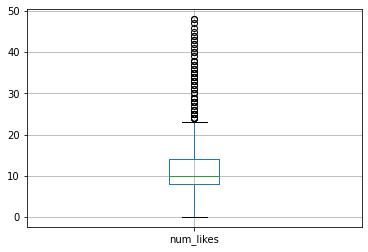

In [10]:
threshold = 50
df[df.num_likes<threshold].boxplot(column='num_likes')

Distribution of categorical features:

In [11]:
categories = [col for col in df if col.startswith('cat')]
categories.remove('cat_Fiction')
# for cat in categories:
#   df.boxplot(column='num_likes', by=cat, vert=False)
#   plt.title(f'num_likes distribution per {cat}')
#   plt.suptitle('')
#   plt.show()

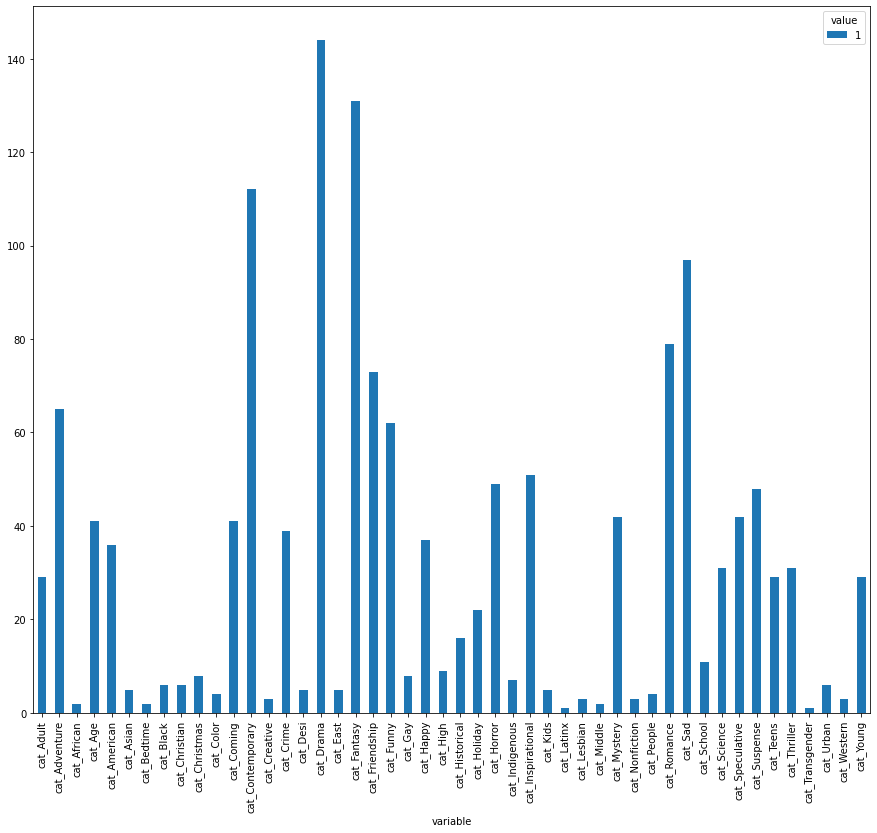

In [12]:
dfm = df[categories].melt()
dfm = dfm[dfm.value==1]
plot_df = (
    pd.crosstab(dfm['variable'], dfm['value'])
)
plot_df.plot.bar(figsize=(15,13))
# plt.tight_layout()
# plt.show()


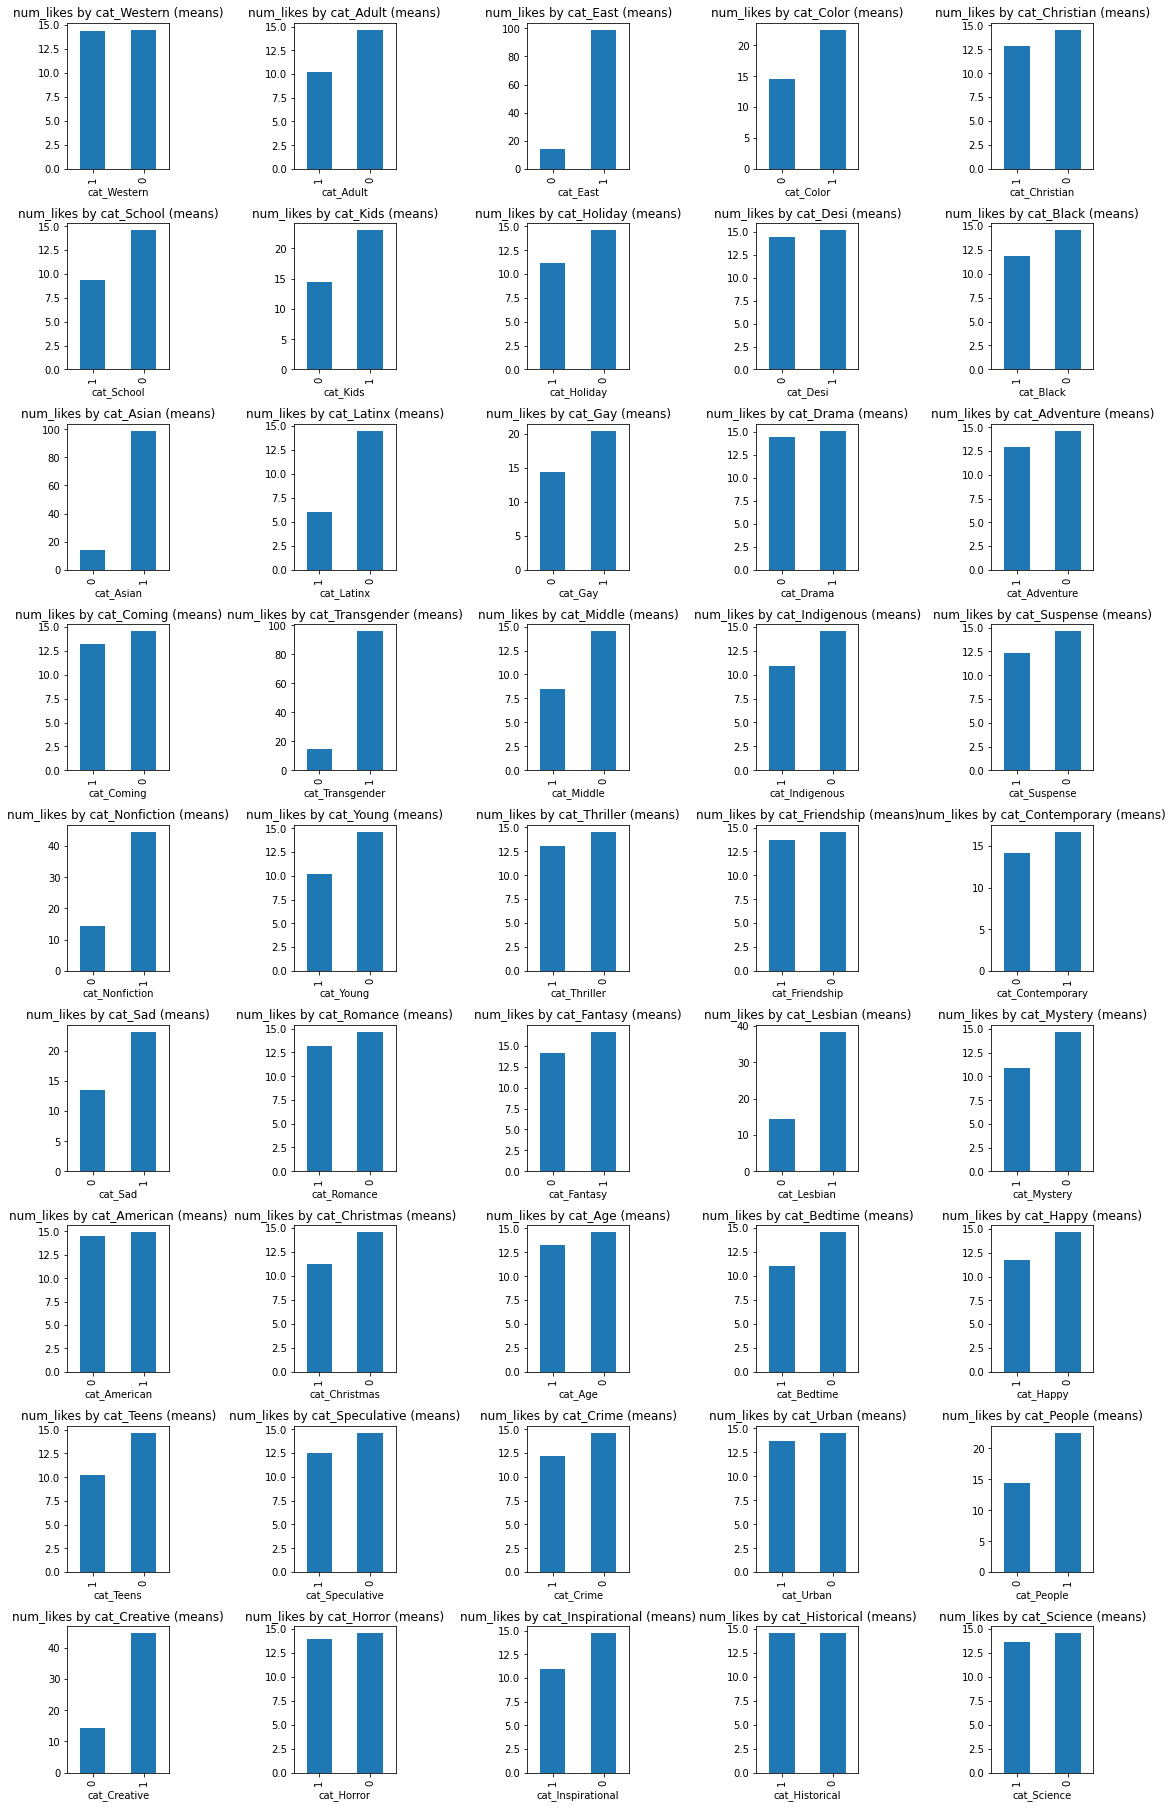

In [70]:
target = 'num_likes'
my_j = int(len(categories)/5)

f,ax=plt.subplots(my_j,
                  5, 
                  figsize=(16,25), 
                  constrained_layout = True)
feat_iter=iter(categories)

for i in range(my_j):
    for j in range(5):
      try:
        x = next(feat_iter)
        df.groupby(x)[target].mean().sort_values().plot.bar(ax=ax[i,j])
        ax[i,j].set_title(f"{target} by {x} (means)")
      except StopIteration:
          pass

## Against target

Correlation of numerical features with target

In [14]:
target = 'num_likes'
threshold = 400
for my_var in numerical:
  print(my_var ,'= ', df[df.num_likes<threshold][my_var].corr(df[df.num_likes<threshold][target]))

num_likes =  0.9999999999999999
num_comments =  0.6432392097337749
num_sent =  0.0012154643517730548
num_words =  -0.007867821676788032
num_unique_words =  0.014225364162614674
unique_words_percent =  0.0391326806766174


Number of likes is our target, so it should be highly correlated with itself (threshold is offset).

Number of comments, as suspected, is highly correlated as well.

The length of the story doesn't seem to have much of a linear correlation with the target.

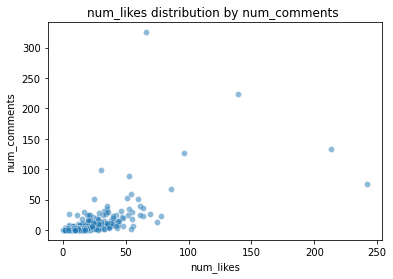

In [15]:
var_to_plot = 'num_comments'
sns.scatterplot(y = var_to_plot, x = target, data = df[df.num_likes<threshold], alpha = 0.5);
plt.title(target + f' distribution by {var_to_plot} ');


Pretty good indicator for at least a certain number of likes.

## Correlation between features

In [16]:
def color_map(val):
    color = 'red' if float(val) < -0.4 else 'green' if float(val) > 0.2  else 'black'
    return 'color: %s' % color

corr = df[numerical].corr()
df_styled = corr.style.applymap(color_map)
df_styled

,num_likes,num_comments,num_sent,num_words,num_unique_words,unique_words_percent
num_likes,1.000000,0.800481,-0.012056,-0.018921,-0.000451,0.037905
num_comments,0.800481,1.000000,-0.016530,-0.002785,0.016958,0.027381
num_sent,-0.012056,-0.016530,1.000000,0.747821,0.646353,-0.564035
num_words,-0.018921,-0.002785,0.747821,1.000000,0.918999,-0.664380
num_unique_words,-0.000451,0.016958,0.646353,0.918999,1.000000,-0.345331
unique_words_percent,0.037905,0.027381,-0.564035,-0.664380,-0.345331,1.000000


## Date published

In [17]:
# plots

## Kmeans & PCA

In [18]:
from sklearn.cluster import KMeans
import re
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pylab
from sklearn.preprocessing import StandardScaler


In [46]:
# choose the number of clusters
k = 3

# choose sample size
sample_size = 15

In [47]:
cols = numerical + categories
X = df[cols].head(sample_size)
scaler = StandardScaler()
scaler.fit(X)

X_ss = scaler.transform(X)
X = pd.DataFrame(data=X_ss, columns=X.columns)
print(f'The shape of X is {X.shape}')

titles = df.head(sample_size).title.values
titles = [re.sub('[^A-Za-z0-9]+', '', x.title()) for x in titles]

The shape of X is (15, 54)


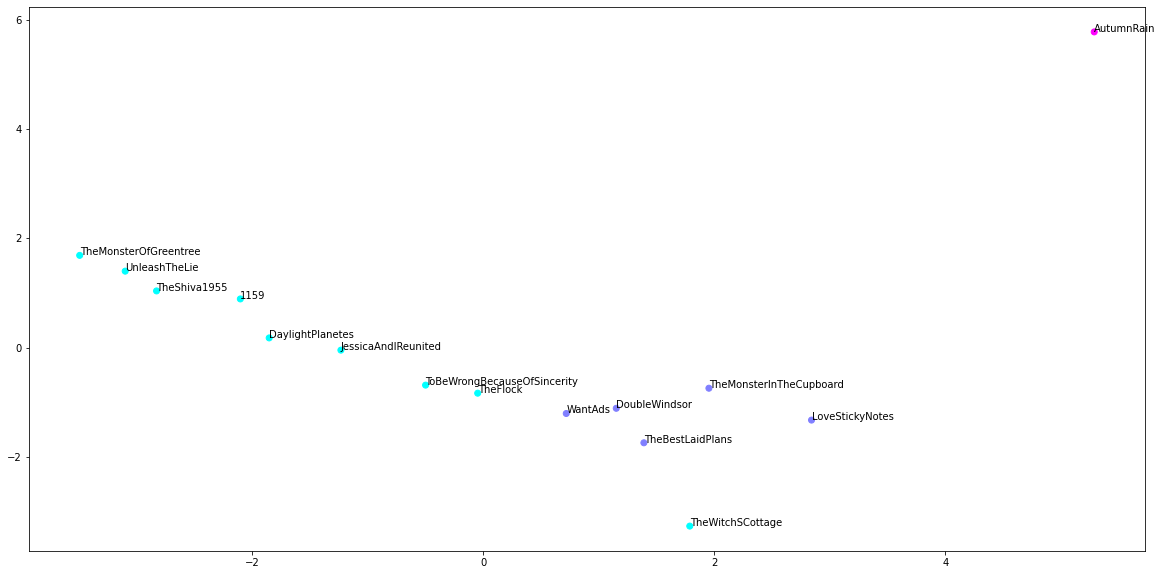

In [48]:
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

pca = PCA(n_components = 2)
Y = pca.fit_transform(X)
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(111)
ax.scatter(Y[:, 0], Y[:, 1], c = labels, cmap = pylab.cm.cool)
for i, word in enumerate(titles):
    ax.annotate(word, xy = (Y[i, 0], Y[i, 1]))

In [49]:
df_pca_comps = pd.DataFrame(pca.components_, columns = X.columns)
tops_comps = pd.DataFrame(df_pca_comps.apply(lambda x:list(X.columns[np.array(x)\
                                        .argsort()[::-1][:3]]), 
                                      axis=1).to_list(),  
                   columns=['Most Important Feature', 
                            '2nd Most Important Feature', 
                            '3rd Most Important Feature'])
tops_comps.index.name = 'component_no'
tops_comps

,Most Important Feature,2nd Most Important Feature,3rd Most Important Feature
component_no,,,
0,unique_words_percent,cat_Sad,num_likes
1,num_comments,cat_Asian,cat_East


# EDA after feature engineering

Feature engineering (to be moved to the feature_extraction.ipynb file).

## age of text

In [ ]:
# TODO

## comparison to an English corpus

In [145]:
import nltk
nltk.download('brown')
from nltk.corpus import brown
brown_corpus = brown.words()
len(brown_corpus)
brown_corpus = list(set(brown_corpus))

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [148]:
# ! pip install english-words
# from english_words import english_words_set

In [146]:
def words_exist_per_cent(row):
  row['words_exist_per_cent'] = 100*len(list(set(row['unique_words'].lower().split("', '")) & set(brown_corpus)))/len(row['unique_words'].lower().split("', '"))
  return row

df = df.apply(words_exist_per_cent, axis=1)

EDA:

Text(0.5, 1.0, 'Distribution of words_exist_per_cent - Brown corpus')

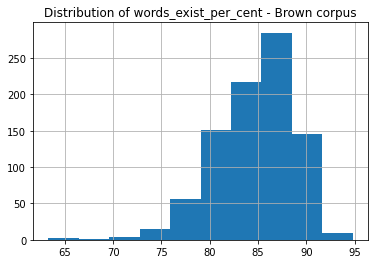

In [150]:
df.words_exist_per_cent.hist()
plt.title('Distribution of words_exist_per_cent - Brown corpus')

## Remove stop words

In [152]:
nltk.download('stopwords')
from nltk.corpus import stopwords, wordnet
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [159]:
def process_unique_words(row):
  row['unique_words'] = row['unique_words'].lower().split("', '")
  return row
df = df.apply(process_unique_words, axis=1)

In [162]:
df['unique_no_stop_words'] = df['unique_words'].apply(lambda x: [word for word in x if word not in stop_words])

In [175]:
def clean_col(row):
  word = row['unique_no_stop_words'][0][2:]
  row['unique_no_stop_words'] = row['unique_no_stop_words'][1:]
  row['unique_no_stop_words'].append(word)
  return row

df = df.apply(clean_col, axis=1)

## Lemmatization

In [ ]:
# TODO

## sentiment 

The sentiment analysis below is naive (not to say stupid). We take the unique words that appear in the text and we apply sentiment analysis.

The right way to go is to take the whole text, lemmatize it, do a sentiment analysis paragraph by paragraph, and take the mean of the sentiment score.

In [187]:
from textblob import TextBlob


In [186]:
def join_into_str(row):
  row['words_in_str'] = ' '.join(row['unique_no_stop_words'])
  return row

df = df.apply(join_into_str, axis=1)

In [190]:
df['sentiment'] = df['words_in_str'].apply(lambda x: TextBlob(x).sentiment.polarity)

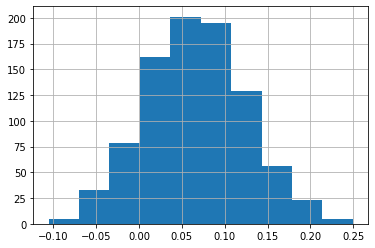

In [191]:
df['sentiment'].hist()

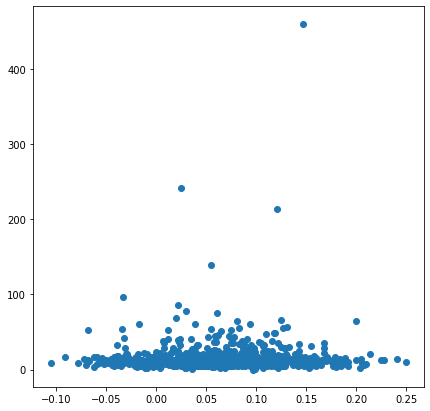

In [195]:
plt.figure(figsize=(7,7))
plt.scatter(df['sentiment'], df['num_likes'])

In [196]:
df['sentiment'].corr(df['num_likes'])

0.021552471531851424

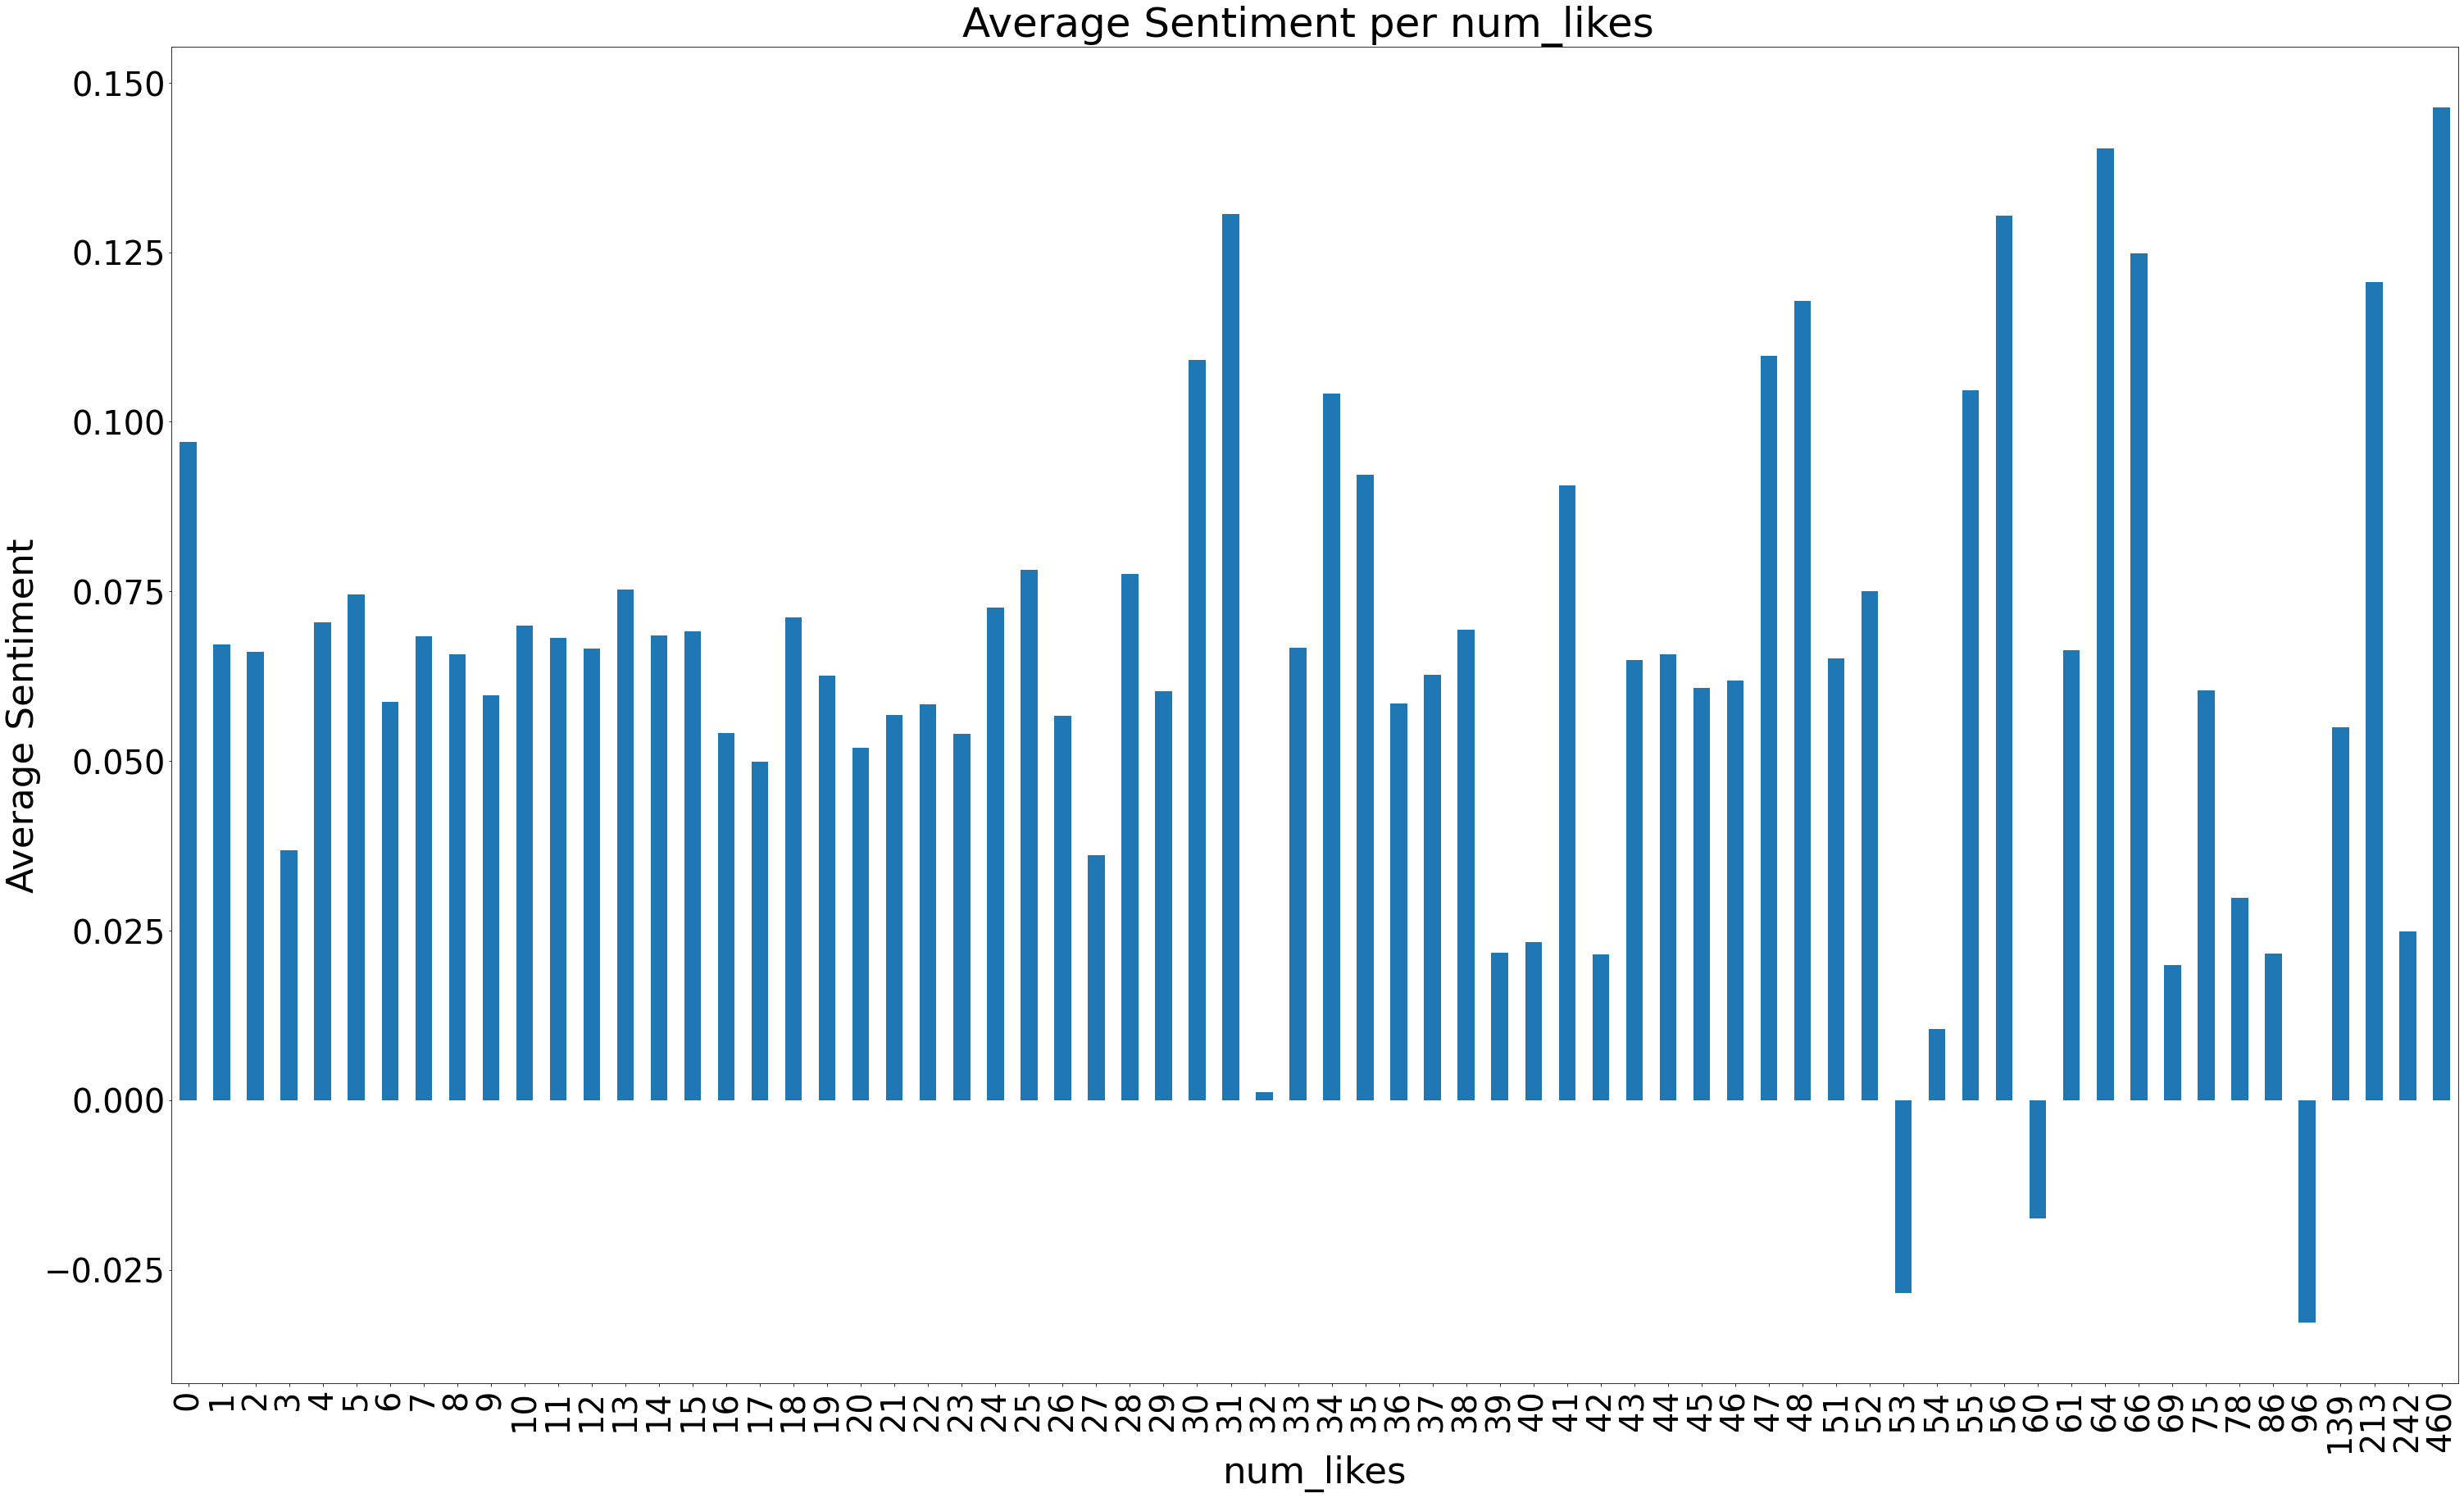

In [197]:
polarity_avg = df.groupby('num_likes')['sentiment'].mean().plot(kind='bar', figsize=(50,30))
plt.xlabel('num_likes', fontsize=45)
plt.ylabel('Average Sentiment', fontsize=45)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Sentiment per num_likes ', fontsize=50)
plt.show()
